## **Machine Learning Visualization with Yellowbrick**

In [ ]:
!pip install yellowbrick==1.4
print("Yellowbrick downgraded to 1.4")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.3 MB/s eta 0:00:00


Yellowbrick downgraded to 1.4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_iris, load_breast_cancer, make_regression, make_blobs, load_diabetes
from sklearn.model_selection import train_test_split, StratifiedKFold
# QuantileTransformer can help with non-normal distributions
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans, KMeans

# Yellowbrick Visualizers
from yellowbrick.classifier import (
    ClassBalance, ConfusionMatrix, ClassificationReport, ROCAUC, PrecisionRecallCurve,
    DiscriminationThreshold
    )

from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.target import FeatureCorrelation


from yellowbrick.features import (
    Rank1D, Rank2D, PCA as YBPCA, JointPlotVisualizer,
    ParallelCoordinates, Manifold
    )

from yellowbrick.regressor import PredictionError, ResidualsPlot, AlphaSelection
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.contrib.wrapper import wrap

# Configuration for plots
sns.set_style ('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100


In [ ]:
print("--- Section 2: Dataset Loading ---")

# 2.1 Classification Dataset (Binary Classification - Breast Cancer)
print("\nLoading Breast Cancer dataset for classification examples...")
data_bc = load_breast_cancer()
X_bc, y_bc = data_bc.data, data_bc.target
feature_names_bc = data_bc.feature_names
target_names_bc = data_bc.target_names # ['malignant', 'benign'] -> 0, 1

# Split for classification tasks
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc
)
print(f"Breast Cancer dataset loaded. X shape: {X_bc.shape}, y shape: {y_bc.shape}")

--- Section 2: Dataset Loading ---

Loading Breast Cancer dataset for classification examples...
Breast Cancer dataset loaded. X shape: (569, 30), y shape: (569,)


In [ ]:
# 2.2 Regression Dataset (Diabetes)
print("\nLoading Diabetes dataset for regression examples...")
data_diabetes = load_diabetes()
X_reg, y_reg = data_diabetes.data, data_diabetes.target
feature_names_reg = data_diabetes.feature_names

# Split for regression tasks
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
print(f"Diabetes dataset loaded. X shape: {X_reg.shape}, y shape: {y_reg.shape}")


Loading Diabetes dataset for regression examples...
Diabetes dataset loaded. X shape: (442, 10), y shape: (442,)


In [ ]:
# 2.3 Clustering Dataset (Synthetic Blobs)
print("\nGenerating synthetic blobs dataset for clustering examples...")
X_cluster, y_cluster = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)
print(f"Clustering dataset generated. X shape: {X_cluster.shape}, y shape: {y_cluster.shape}")


Generating synthetic blobs dataset for clustering examples...
Clustering dataset generated. X shape: (1000, 2), y shape: (1000,)


In [ ]:
print("--- Section 3: Visualizers for Classification ---")

# Let's use Logistic Regression as our classifier for demonstration
# We'll use a pipeline for preprocessing
pipeline_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear', multi_class='auto', random_state=42))
])

--- Section 3: Visualizers for Classification ---



3.1 Class Balance Visualizer:


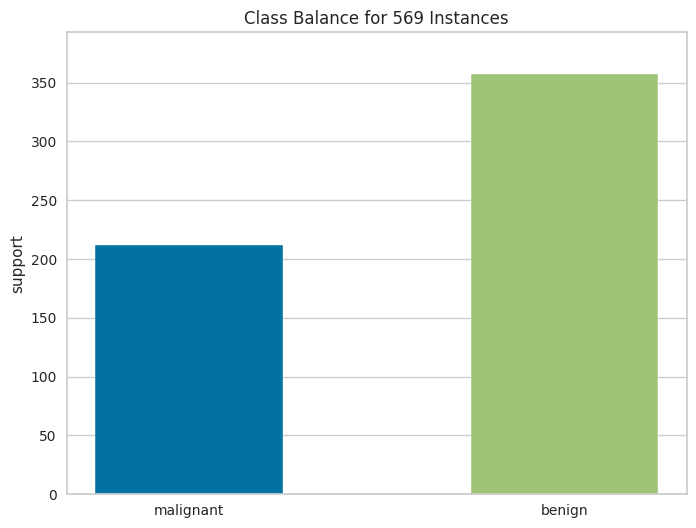

Class Balance visualizer displayed.


In [ ]:
print("\n3.1 Class Balance Visualizer:")
# Visualizes the distribution of classes in the target variable.
# Crucial for identifying imbalanced datasets early on.
plt.figure(figsize=(8, 6))
visualizer = ClassBalance(labels=target_names_bc)
visualizer.fit(y_bc) # Just fit on the target variable
visualizer.show()
plt.close() # Close plot to prevent it from showing up twice if running all at once
print("Class Balance visualizer displayed.")


3.2 Feature Importances Visualizer (using RandomForestClassifier):


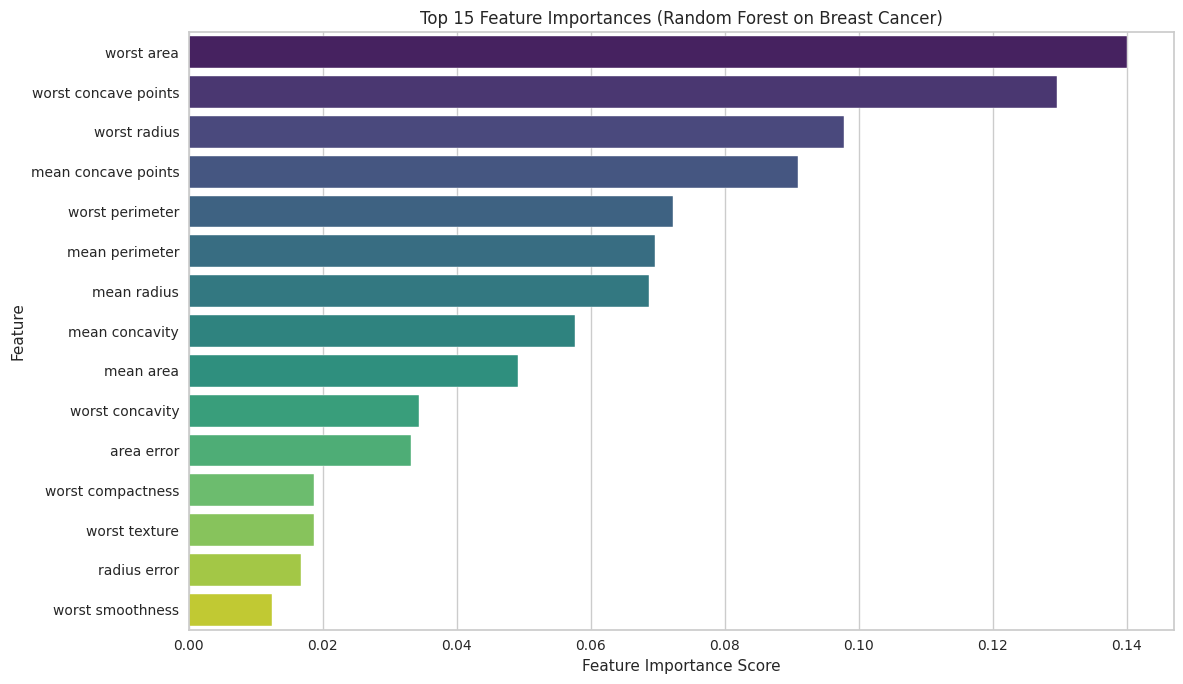

Feature Importances plotted manually (Common requirement for tree models).


In [ ]:
print("\n3.2 Feature Importances Visualizer (using RandomForestClassifier):")
# Identifies which features the model considers most important for making predictions.
# This is a general feature visualizer, but highly relevant for models that output importance.
# Yellowbrick doesn't have a direct "FeatureImportances" visualizer for generic models,
# but `Rank1D` or `FeatureCorrelation` can show feature properties.
# For tree-based models, you can typically access `feature_importances_`.

# Let's use RandomForestClassifier for feature importances
rf_model_bc = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', rf_model_bc)
])
pipeline_rf.fit(X_train_bc, y_train_bc)

# The `FeatureImportances` visualizer is part of `yellowbrick.model_selection` or can be
# custom built. For tree-based models, direct access is cleaner.
# Yellowbrick's `Rank1D` can show statistical properties, but not model-specific importance directly.
# Let's manually plot it for Random Forest, as it's a common need.

importances = pipeline_rf.named_steps['model'].feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': feature_names_bc,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest on Breast Cancer)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Feature Importances plotted manually (Common requirement for tree models).")


3.3 Classification Report Visualizer:


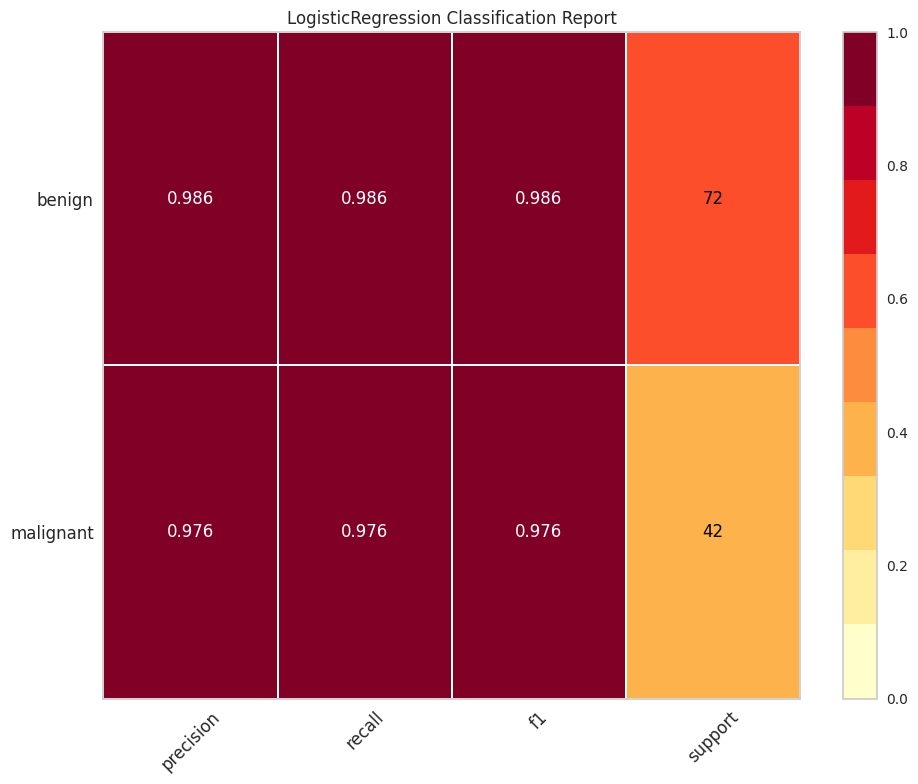

Classification Report visualizer displayed.


In [ ]:
print("\n3.3 Classification Report Visualizer:")
# Displays precision, recall, F1-score, and support for each class.
# Excellent for a quick, comprehensive view of classifier performance.
plt.figure(figsize=(10, 8))
visualizer = ClassificationReport(pipeline_clf, classes=target_names_bc, support=True)
visualizer.fit(X_train_bc, y_train_bc) # Fit the visualizer with the training data
visualizer.score(X_test_bc, y_test_bc) # Evaluate the model on the test data
visualizer.show()
plt.close()
print("Classification Report visualizer displayed.")


3.4 Confusion Matrix Visualizer:


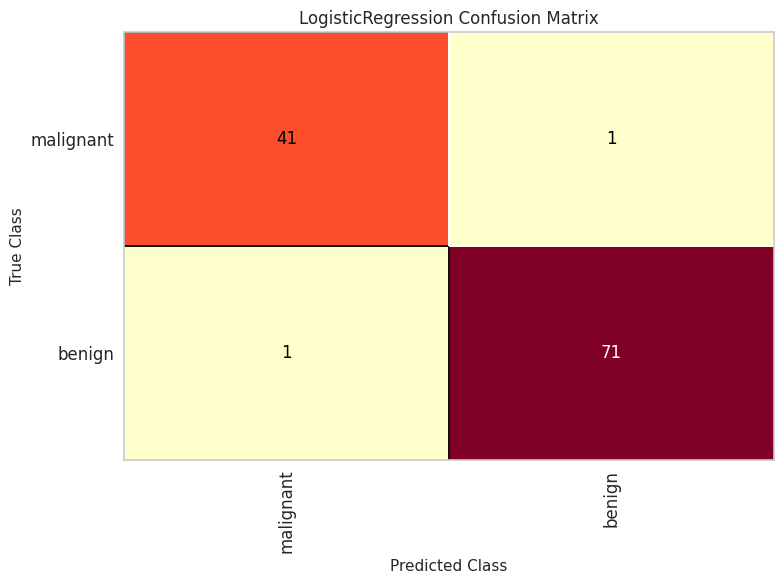

Confusion Matrix visualizer displayed.


In [ ]:
print("\n3.4 Confusion Matrix Visualizer:")
# Shows the counts of true positives, true negatives, false positives, and false negatives.
# Essential for understanding misclassifications.
plt.figure(figsize=(8, 6))
visualizer = ConfusionMatrix(pipeline_clf, classes=target_names_bc, percent=False) # percent=True for proportions
visualizer.fit(X_train_bc, y_train_bc)
visualizer.score(X_test_bc, y_test_bc)
visualizer.show()
plt.close()
print("Confusion Matrix visualizer displayed.")


3.5 ROCAUC Curve Visualizer:


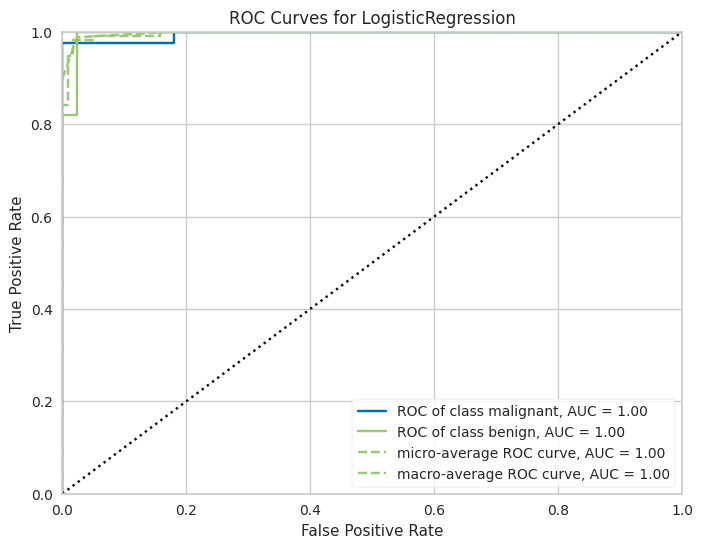

ROCAUC Curve visualizer displayed.


In [ ]:
print("\n3.5 ROCAUC Curve Visualizer:")
# For binary classification, plots the True Positive Rate vs. False Positive Rate.
# Includes AUC score, which summarizes the curve.
plt.figure(figsize=(8, 6))
visualizer = ROCAUC(pipeline_clf, classes=target_names_bc)
visualizer.fit(X_train_bc, y_train_bc)
visualizer.score(X_test_bc, y_test_bc)
visualizer.show()
plt.close()
print("ROCAUC Curve visualizer displayed.")


3.6 Precision-Recall Curve Visualizer:


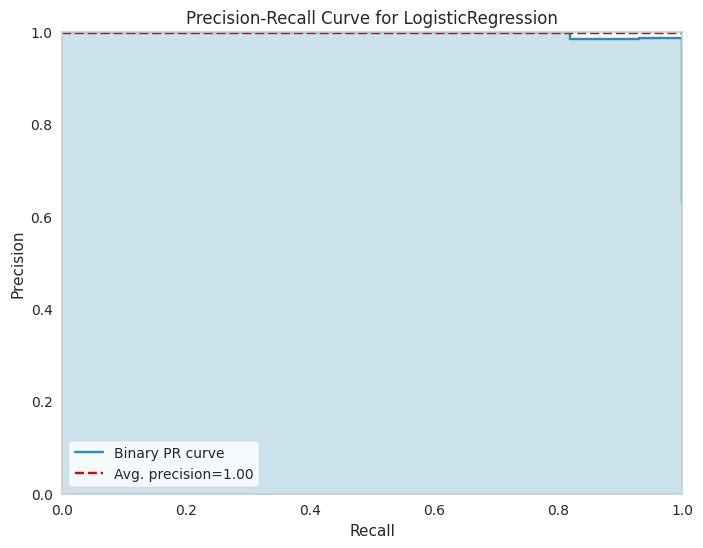

Precision-Recall Curve visualizer displayed.


In [ ]:
print("\n3.6 Precision-Recall Curve Visualizer:")
# Especially useful for imbalanced datasets, where ROCAUC can be misleading.
# Plots Precision vs. Recall for different thresholds.
plt.figure(figsize=(8, 6))
visualizer = PrecisionRecallCurve(pipeline_clf)
visualizer.fit(X_train_bc, y_train_bc)
visualizer.score(X_test_bc, y_test_bc)
visualizer.show()
plt.close()
print("Precision-Recall Curve visualizer displayed.")

--- Section 4: Visualizers for Regression ---

4.1 Prediction Error Visualizer:


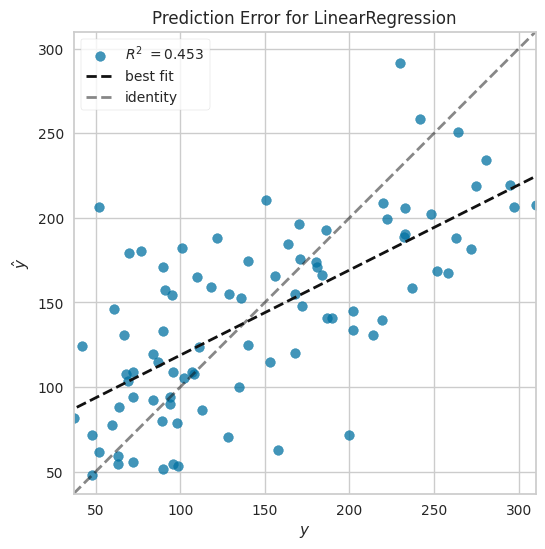

Prediction Error visualizer displayed.


In [ ]:
print("--- Section 4: Visualizers for Regression ---")

# Let's use Linear Regression as our regressor
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

print("\n4.1 Prediction Error Visualizer:")
# Plots the actual values against the predicted values.
# Ideally, points should fall on a 45-degree line.
plt.figure(figsize=(8, 6))
visualizer = PredictionError(pipeline_reg)
visualizer.fit(X_train_reg, y_train_reg)
visualizer.score(X_test_reg, y_test_reg)
visualizer.show()
plt.close()
print("Prediction Error visualizer displayed.")


4.2 Residuals Plot Visualizer:


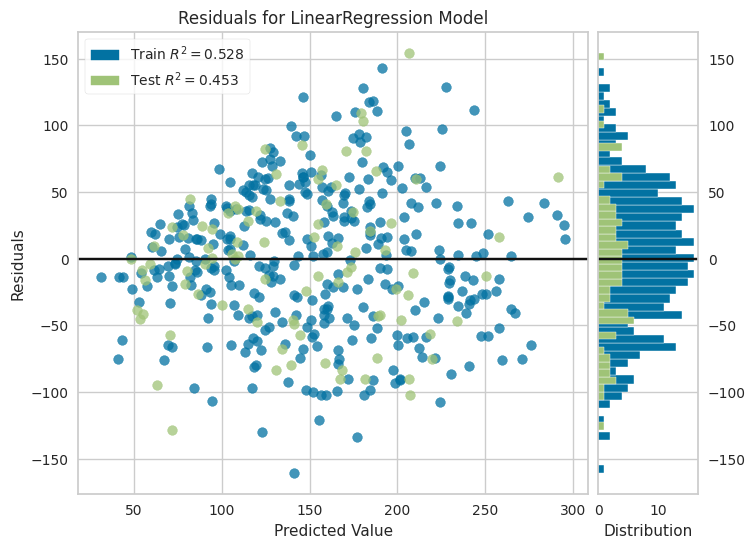

Residuals Plot visualizer displayed.


In [ ]:
print("\n4.2 Residuals Plot Visualizer:")
# Plots the residuals (errors) against the predicted values.
# Ideally, residuals should be randomly scattered around zero, with no clear pattern.
plt.figure(figsize=(8, 6))
visualizer = ResidualsPlot(pipeline_reg)
visualizer.fit(X_train_reg, y_train_reg)
visualizer.score(X_test_reg, y_test_reg)
visualizer.show()
plt.close()
print("Residuals Plot visualizer displayed.")


4.3 Alpha Selection Visualizer (for regularized models like Lasso/Ridge):


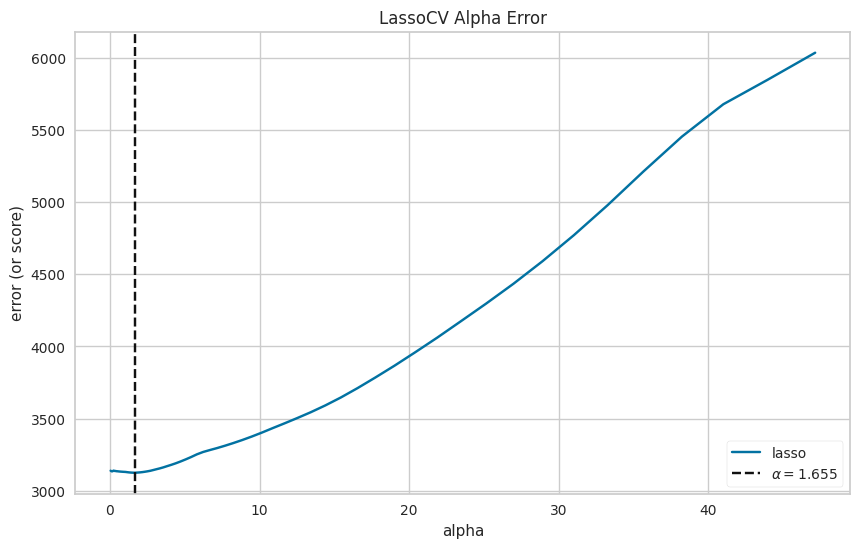

Alpha Selection visualizer displayed (for LassoCV regression).


In [ ]:
from sklearn.linear_model import Lasso, LassoCV # Import LassoCV

print("\n4.3 Alpha Selection Visualizer (for regularized models like Lasso/Ridge):")
# Helps in selecting the optimal regularization parameter (alpha).
# Plots R2 score and mean squared error for different alpha values.
# Using LassoCV regression as an example.
plt.figure(figsize=(10, 6))
# CHANGE HERE: Use LassoCV instead of Lasso
visualizer = AlphaSelection(LassoCV(random_state=42, n_jobs=-1), alphas=np.logspace(-3, 0, 10)) # alphas can be optional for CV models
visualizer.fit(StandardScaler().fit_transform(X_train_reg), y_train_reg) # Scale before Lasso
visualizer.show()
plt.close()
print("Alpha Selection visualizer displayed (for LassoCV regression).")

--- Section 5: Visualizers for Clustering ---

5.1 K-Elbow Visualizer:


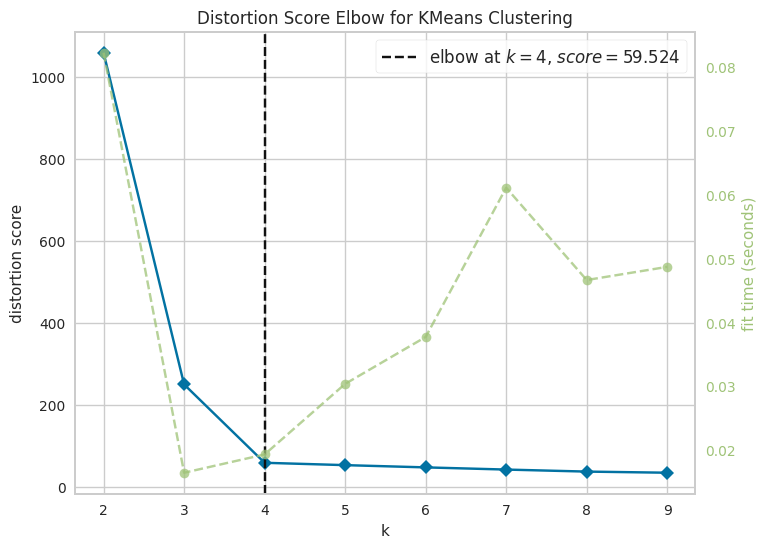

K-Elbow visualizer displayed.
Optimal K suggested by Elbow Method: 4


In [ ]:
print("--- Section 5: Visualizers for Clustering ---")

# Use KMeans for clustering demonstration
kmeans_model = KMeans(random_state=42, n_init=10) # n_init to suppress warning

print("\n5.1 K-Elbow Visualizer:")
# Implements the "Elbow Method" to find the optimal number of clusters (k).
# Looks for the "elbow" point where adding more clusters doesn't significantly reduce inertia.
plt.figure(figsize=(8, 6))
visualizer = KElbowVisualizer(kmeans_model, k=(2,10)) # Test k from 2 to 9
visualizer.fit(StandardScaler().fit_transform(X_cluster)) # Scale clustering data
visualizer.show()
plt.close()
print("K-Elbow visualizer displayed.")
optimal_k = visualizer.elbow_value_
print(f"Optimal K suggested by Elbow Method: {optimal_k}")


5.2 Silhouette Visualizer:


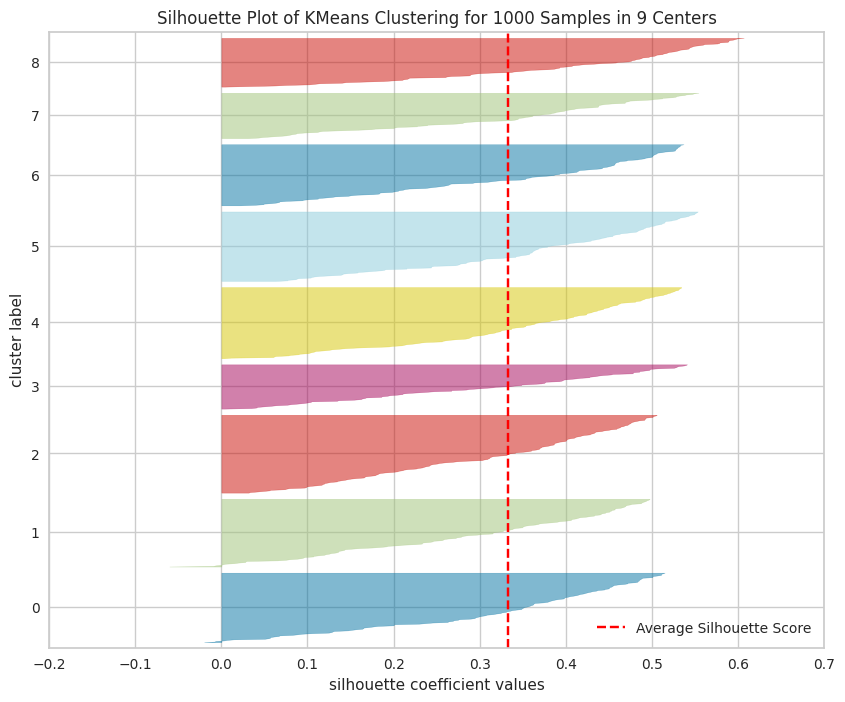

Silhouette Visualizer displayed.


In [ ]:
print("\n5.2 Silhouette Visualizer:")
# Plots the silhouette score for each sample within each cluster.
# Helps assess cluster separation and cohesion. Higher silhouette score is better.
plt.figure(figsize=(10, 8))
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick', k=optimal_k) # Use optimal_k
visualizer.fit(StandardScaler().fit_transform(X_cluster))
visualizer.show()
plt.close()
print("Silhouette Visualizer displayed.")

In [ ]:
# --- Section 6: Visualizers for Model Selection & Diagnostics ---
print("--- Section 6: Visualizers for Model Selection & Diagnostics ---")

# Reusing Breast Cancer dataset for classification diagnostics
pipeline_clf_diag = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear', multi_class='auto', random_state=42))
])

--- Section 6: Visualizers for Model Selection & Diagnostics ---



6.1 Learning Curve Visualizer:


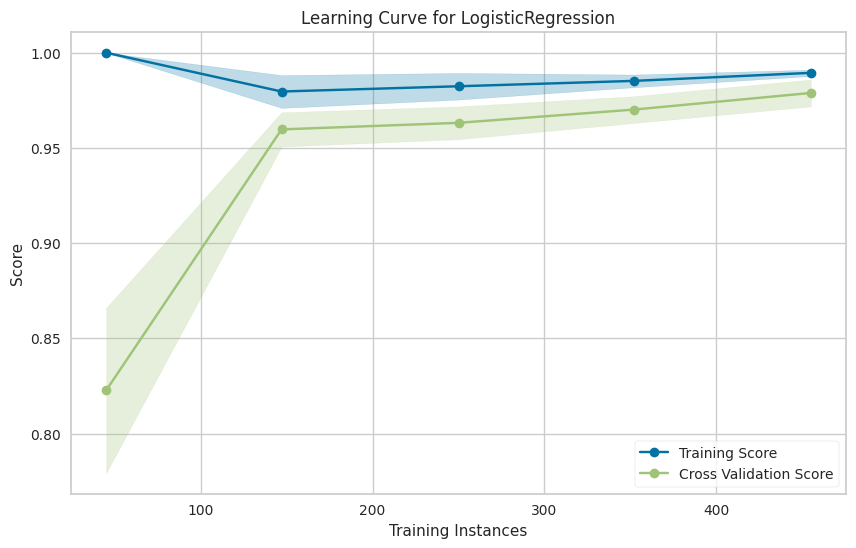

Learning Curve visualizer displayed.
Interpretation: A large gap between training and cross-validation scores suggests high variance/overfitting.
If both scores are low and flat, it suggests high bias/underfitting.


In [ ]:
print("\n6.1 Learning Curve Visualizer:")
# Plots training and validation scores against the number of training examples.
# Helps diagnose bias (underfitting) and variance (overfitting).
plt.figure(figsize=(10, 6))
visualizer = LearningCurve(pipeline_clf_diag, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted', n_jobs=-1)
visualizer.fit(X_bc, y_bc) # Fit on the full dataset for learning curve
visualizer.show()
plt.close()
print("Learning Curve visualizer displayed.")
print("Interpretation: A large gap between training and cross-validation scores suggests high variance/overfitting.")
print("If both scores are low and flat, it suggests high bias/underfitting.")


6.2 Validation Curve Visualizer:


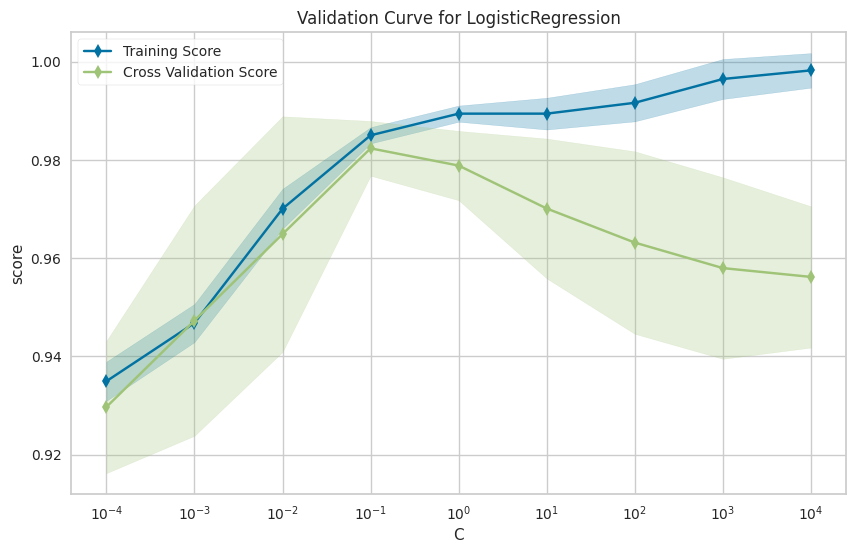

Validation Curve visualizer displayed (tuning Logistic Regression C parameter).
Interpretation: Look for the 'C' value where the validation score is highest and stable.


In [ ]:
print("\n6.2 Validation Curve Visualizer:")
# Plots training and validation scores for varying values of a single hyperparameter.
# Useful for tuning a specific hyperparameter.
# Example: Tuning 'C' (regularization strength) for Logistic Regression
plt.figure(figsize=(10, 6))
param_range = np.logspace(-4, 4, 9) # e.g., 0.0001, 0.001, ..., 10000
visualizer = ValidationCurve(
    pipeline_clf_diag.named_steps['model'], # Pass the model directly, not the pipeline
    param_name="C", # Hyperparameter to tune
    param_range=param_range,
    cv=StratifiedKFold(n_splits=5),
    scoring="f1_weighted",
    n_jobs=-1,
    logx=True # Use logarithmic scale for param_range
)
# Note: X should be scaled before passing to ValidationCurve if model expects it.
# We'll manually scale X_bc here since the visualizer expects the model directly.
X_scaled_bc = StandardScaler().fit_transform(X_bc)
visualizer.fit(X_scaled_bc, y_bc)
visualizer.show()
plt.close()
print("Validation Curve visualizer displayed (tuning Logistic Regression C parameter).")
print("Interpretation: Look for the 'C' value where the validation score is highest and stable.")


6.3 Feature Correlation Visualizer:


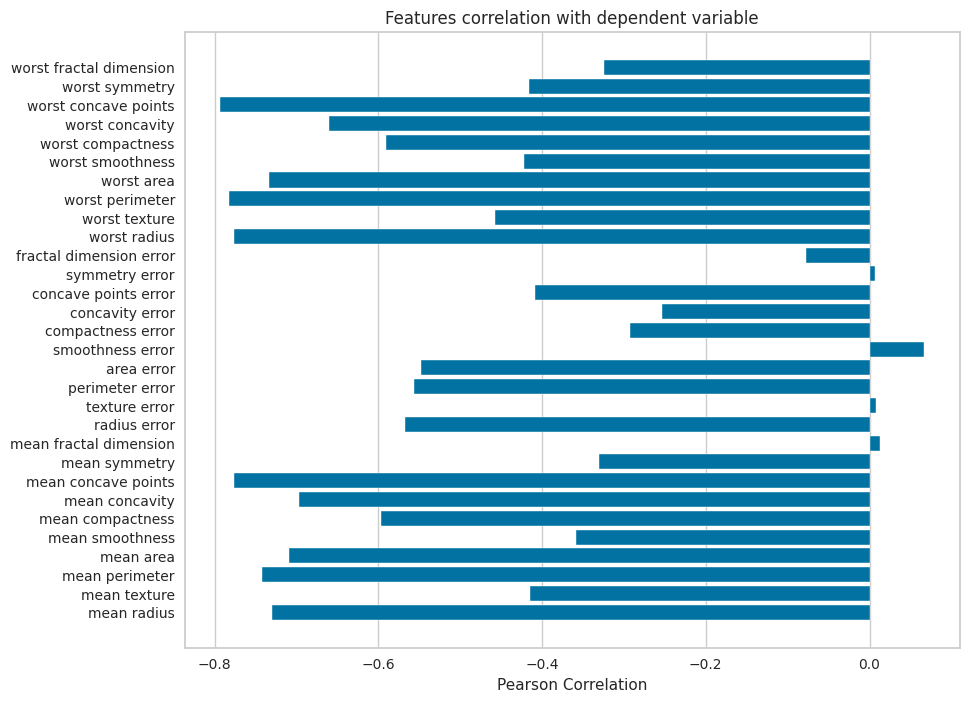

Feature Correlation visualizer displayed.


In [ ]:
print("\n6.3 Feature Correlation Visualizer:")
# Visualizes the pairwise correlation between features in the dataset.
plt.figure(figsize=(10, 8))

# Create a DataFrame for X_bc
X_bc_df = pd.DataFrame(X_bc, columns=feature_names_bc)

# Initialize with labels (feature_names) directly in the constructor
# The 'method' parameter is usually for how correlations are computed (e.g., 'pearson', 'spearman')
# For FeatureCorrelation, the `labels` parameter is used for the feature names.
visualizer = FeatureCorrelation(labels=feature_names_bc, method='pearson')

# Fit with the DataFrame, passing the target `y`
visualizer.fit(X_bc_df, y_bc) # Pass DataFrame X and target y
visualizer.show()
plt.close()
print("Feature Correlation visualizer displayed.")

--- Section 7: Integration with Scikit-learn Pipelines ---

Example: ROCAUC with a full classification pipeline (Scaling + Logistic Regression).


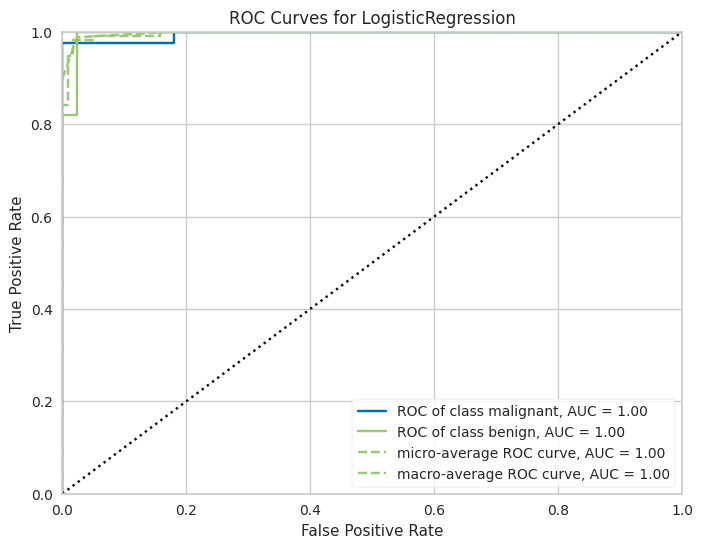

ROCAUC for a pipeline displayed - demonstrating seamless integration.


In [ ]:
# --- Section 7: Integration with Scikit-learn Pipelines (Advanced Example) ---
print("--- Section 7: Integration with Scikit-learn Pipelines ---")

# Yellowbrick visualizers are designed to work seamlessly with scikit-learn pipelines.
# You just pass the pipeline as the estimator.

print("\nExample: ROCAUC with a full classification pipeline (Scaling + Logistic Regression).")
# The `pipeline_clf` defined earlier already includes StandardScaler and LogisticRegression.
# We've used it in earlier sections, but this emphasizes its structure.
plt.figure(figsize=(8, 6))
visualizer = ROCAUC(pipeline_clf, classes=target_names_bc)
visualizer.fit(X_train_bc, y_train_bc)
visualizer.score(X_test_bc, y_test_bc)
visualizer.show()
plt.close()
print("ROCAUC for a pipeline displayed - demonstrating seamless integration.")


Example: Learning Curve for a Random Forest Classifier within a pipeline.


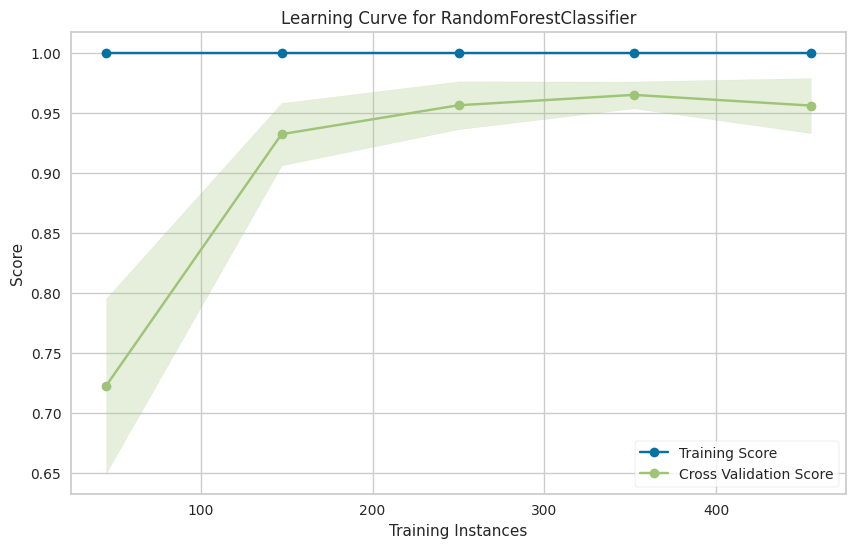

Learning Curve for a Random Forest pipeline displayed.


In [ ]:
print("\nExample: Learning Curve for a Random Forest Classifier within a pipeline.")
pipeline_rf_lc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])
plt.figure(figsize=(10, 6))
visualizer = LearningCurve(pipeline_rf_lc, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted', n_jobs=-1)
visualizer.fit(X_bc, y_bc)
visualizer.show()
plt.close()
print("Learning Curve for a Random Forest pipeline displayed.")